# Settings

In [4]:
%matplotlib inline
from collections import defaultdict

PCT_TEST_SPLIT = 0.2

data_dir = "/Users/simon.hughes/Google Drive/Phd/Data/"
folder = data_dir + "CoralBleaching/BrattData/EBA1415_Merged/"

# Map .ann And .txt Files

In [5]:
import os, re

def find_files(folder, regex, remove_empty = False):
    """
    Find all files matching the [regex] pattern in [folder]

    folder  :   string
                    folder to search (not recursive)
    regex   :   string (NOT regex object)
                    pattern to match
    """
    files = os.listdir(folder)
    matches = [os.path.abspath(os.path.join(folder, f))
               for f in files
               if re.search(regex, f, re.IGNORECASE)]

    if remove_empty:
        matches = [f for f in matches if os.path.getsize(f) > 0]
    matches.sort()
    return matches

In [6]:
ann_files = find_files(folder, "\.ann$", remove_empty=True)
txt_files = find_files(folder, "\.txt$", remove_empty=True)
len(ann_files), len(txt_files)

(1154, 1161)

In [26]:
def get_prefix(fname):
    return fname[:-4]

dct_ann = defaultdict(set)
for ann in ann_files:
    prefix = get_prefix(ann)
    dct_ann[prefix].add(ann)

dct_txt = defaultdict(set)
for txt in txt_files:
    prefix = get_prefix(txt)
    dct_txt[prefix].add(txt)

len(dct_ann), len(dct_txt)

(1154, 1161)

### Joined Represents a Mapping Between Prefixes and (.ann,.txt) Filenames

In [27]:
joined = {}
for prfx in dct_ann.keys():
    if prfx in dct_txt:
        joined[prfx] = (dct_ann[prfx], dct_txt[prfx])
len(joined)

1154

# Load and Parse Actual The Essay Files (Removing Invalid and Empty Files)

In [16]:
from BrattEssay import load_bratt_essays
from collections import defaultdict
from IterableFP import flatten
from Settings import Settings

settings = Settings()
essays = load_bratt_essays(folder)

Results Dir: /Users/simon.hughes/Google Drive/Phd/Results/
Data Dir:    /Users/simon.hughes/Google Drive/Phd/Data/
Root Dir:    /Users/simon.hughes/GitHub/NlpResearch/
Public Data: /Users/simon.hughes/GitHub/NlpResearch/Data/PublicDatasets/
1154 files found
Skipping /Users/simon.hughes/Google Drive/Phd/Data/CoralBleaching/BrattData/EBA1415_Merged/EBA1415_AEKD_4_CB_ES-05571.ann file as .txt file is no essay'
Skipping /Users/simon.hughes/Google Drive/Phd/Data/CoralBleaching/BrattData/EBA1415_Merged/EBA1415_AEKD_4_CB_ES-05904.ann file as .txt file is no essay'
Skipping /Users/simon.hughes/Google Drive/Phd/Data/CoralBleaching/BrattData/EBA1415_Merged/EBA1415_BGJD_1_CB_ES-05733.ann file as .txt file is no essay //'
Skipping /Users/simon.hughes/Google Drive/Phd/Data/CoralBleaching/BrattData/EBA1415_Merged/EBA1415_ERSK_7_CB_ES-05798.ann file as .txt file is no essay //'
Skipping /Users/simon.hughes/Google Drive/Phd/Data/CoralBleaching/BrattData/EBA1415_Merged/EBA1415_KYLS_5_CB_ES-05671.ann fi

### Now Remove Invalid Files from the Joined List

In [40]:
valid_essays = set(map(lambda essay: get_prefix(essay.full_path), essays))
match = set((e for e in valid_essays if e in joined))
len(valid_essays), len(match), len(joined)

(1128, 1128, 1128)

In [41]:
deleted = 0
for e in list(joined.keys()):
    if e not in match:
        del joined[e]
        deleted+=1
print deleted, "Essays deleted"
print len(valid_essays), len(match), len(joined)

0 Essays deleted
1128 1128 1128


# Partition into Train and Test Sets

### 1. Calculate the Partition Sizes (in ints):

In [101]:
num = len(joined.keys())
n_test = int(round(PCT_TEST_SPLIT * len(joined.keys())))
print "Test:", n_test, "\tTrain:", num - n_test, "\tTotal:", num
print round(float(n_test) / num * 100,4), "%"

Test: 226 	Train: 902 	Total: 1128
20.0355 %


In [107]:
assert num == len(essays), "Total should match number of essays"

### 2. Create Partition, and Compute Code Distributions

### Compute Counts Across Whole Corpus

In [53]:
nm_wds = 0
num_sentences = 0
all_codes = set()
for essay in essays:
    for sentence in essay.tagged_sentences:
        num_sentences+=1
        for wd, tags in sentence:
            num_wds +=1
            all_codes.update(tags)
num_wds, num_sentences, len(all_codes)

(503622, 10210, 190)

### Segment Codes by Category

In [69]:
regular_codes = sorted([c for c in all_codes if c[0].isdigit()], key=lambda c: (len(c), c))
causal_codes = sorted([c for c in all_codes if "->" in c])
print "regular", regular_codes
print "causal", "\n".join(causal_codes)

regular ['1', '2', '3', '4', '5', '6', '7', '11', '12', '13', '14', '50', '5b']
causal Causer:1->Result:11
Causer:1->Result:13
Causer:1->Result:14
Causer:1->Result:2
Causer:1->Result:3
Causer:1->Result:4
Causer:1->Result:5
Causer:1->Result:50
Causer:1->Result:6
Causer:1->Result:7
Causer:1->Result:Anaphor
Causer:1->Result:other
Causer:1->Result:rhetorical
Causer:11->Result:11
Causer:11->Result:12
Causer:11->Result:13
Causer:11->Result:14
Causer:11->Result:3
Causer:11->Result:4
Causer:11->Result:50
Causer:11->Result:6
Causer:11->Result:Anaphor
Causer:11->Result:rhetorical
Causer:12->Result:11
Causer:12->Result:13
Causer:12->Result:14
Causer:12->Result:50
Causer:12->Result:5b
Causer:12->Result:7
Causer:13->Result:11
Causer:13->Result:12
Causer:13->Result:14
Causer:13->Result:4
Causer:13->Result:5
Causer:13->Result:50
Causer:13->Result:6
Causer:13->Result:7
Causer:13->Result:Anaphor
Causer:13->Result:rhetorical
Causer:14->Result:50
Causer:14->Result:6
Causer:14->Result:7
Causer:14->Result:

In [258]:
def compute_tag_distributions(essays, codes=None):
    if not codes:
        codes = all_codes
    else:
        codes = set(codes)
        
    wd_tag_freq = defaultdict(int)
    sent_tag_freq = defaultdict(int)
    num_wds = 0
    num_sentences = 0
    for essay in essays:
        for sentence in essay.tagged_sentences:
            num_sentences+=1
            # compute unique tags for sentence for computing sentence distributions
            un_tags = set()
            for wd, tags in sentence:
                num_wds +=1
                tags = tags.intersection(codes)
                if not tags:
                    continue
        
                un_tags.update(tags)
                for tag in tags:
                    wd_tag_freq[tag] += 1
            for tag in un_tags:
                sent_tag_freq[tag] += 1
    
    for tag in wd_tag_freq.keys():
        wd_tag_freq[tag] = float(wd_tag_freq[tag])/ float(num_wds)
        sent_tag_freq[tag] = float(sent_tag_freq[tag] / float(num_sentences))
    
    return wd_tag_freq, sent_tag_freq

In [259]:
import pandas as pd
def to_df(freq_dct):
    return pd.DataFrame({"codes": freq_dct.keys(), "freq": freq_dct.values()}).sort_values("codes")

In [260]:
wd_freq, sent_freq = compute_tag_distributions(essays, regular_codes)
to_df(wd_freq)

,codes,freq
5,1,0.033245
0,11,0.006267
2,12,0.005069
1,13,0.013367
3,14,0.014713
7,2,0.008494
6,3,0.053600
9,4,0.018853
8,5,0.014535
4,50,0.088596


In [94]:
to_df(sent_freq)

,codes,freq
5,1,0.126934
0,11,0.036631
2,12,0.012243
1,13,0.049167
3,14,0.033399
7,2,0.022625
6,3,0.146131
9,4,0.054065
8,5,0.062488
4,50,0.393830


In [97]:
print sum(wd_freq.values()) # A lot of words have 0 tags
print sum(sent_freq.values()) # overlapping codes, a small number of sentences with no codes

0.310327984083
1.09627815867


In [111]:
import numpy as np
from numpy import random
def random_splt(essays, n_test):
    np_essays = np.asarray(essays)
    # inplace shuffle
    random.shuffle(np_essays)
    test, train = np_essays[:n_test], np_essays[n_test:]
    assert len(test) == n_test, "Test set size does not equal expected"
    return train, test

In [115]:
# Test Function
train, test = random_splt(essays, n_test)
assert n_test == len(test), "Test set not expected size"
assert len(essays) == (len(train) + len(test)), "Train and Test set sizes should equal total essays size"
len(train), len(test)

(902, 226)

## Compute Kullback-Leibler Divergence to Find the Closest Distribution

In [200]:
# log is not defined if the denom is 0. if the denom is 0
# this is a bad split, as we want all codes to be represented
# so return max_val, as we are trying to minimize the divergence
max_val = 99999999
def kl(a,b):
    join = zip(a,b)
    kl_val_a = 0.0
    kl_val_b = 0.0
    for pa, pb in join:
        if pa == 0.0 or pb == 0.0:
            return max_val,max_val
        kl_val_a += pa*np.log(pa/pb)
        kl_val_b += pb*np.log(pb/pa)
    return kl_val_a, kl_val_b

In [201]:
def compare_wd_tag_dist(test_essays, codes):
    all_wd_freq, _ = compute_tag_distributions(essays, codes)
    test_wd_freq,_ = compute_tag_distributions(test_essays, codes)
    return pd.merge(to_df(all_wd_freq), to_df(test_wd_freq), on="codes", suffixes=["all", "test"])

def compare_sent_tag_dist(test_essays, codes):
    _, all_sent_freq  = compute_tag_distributions(essays, codes)
    _, test_sent_freq = compute_tag_distributions(test_essays, codes)
    return pd.merge(to_df(all_sent_freq), to_df(test_sent_freq), on="codes", suffixes=["all", "test"])

In [194]:
%%time
kl_vals = {}
for i in range(1000):
    train, test = random_splt(essays, n_test)
    test_wd_freq, test_sent_freq = compute_tag_distributions(test, regular_codes)
    vals = kl(wd_freq.values(), test_wd_freq.values())
    # map to abs values
    vals = list(map(abs, vals))
    max_val = max(vals)
    kl_vals[max_val] = (train,test)

# Get best
best_kl_code, best_code_split = min(kl_vals.items(), key=lambda (k,v): k)
best_kl_code

CPU times: user 14.5 s, sys: 24 ms, total: 14.5 s
Wall time: 14.5 s


In [204]:
best_kl_code

0.00055890516668596945

In [202]:
train, test = best_code_split
compare_wd_tag_dist(test, regular_codes)

,codes,freqall,freqtest
0,1,0.033245,0.033315
1,11,0.006267,0.006847
2,12,0.005069,0.004184
3,13,0.013367,0.015374
4,14,0.014713,0.015754
5,2,0.008494,0.008115
6,3,0.053600,0.053000
7,4,0.018853,0.018734
8,5,0.014535,0.012838
9,50,0.088596,0.091261


In [203]:
compare_wd_tag_dist(test, causal_codes)

,codes,freqall,freqtest
0,Causer:1->Result:2,0.006964,0.005103
1,Causer:1->Result:3,0.017525,0.014677
2,Causer:1->Result:50,0.025698,0.021904
3,Causer:1->Result:7,0.000465,0.001078
4,Causer:1->Result:rhetorical,0.001936,0.001743
5,Causer:11->Result:12,0.005272,0.005008
6,Causer:11->Result:13,0.007244,0.009256
7,Causer:11->Result:14,0.001042,0.000951
8,Causer:11->Result:3,0.000274,0.000285
9,Causer:11->Result:50,0.004039,0.005230


In [195]:
%%time
kl_vals = {}
for i in range(10000):
    train, test = random_splt(essays, n_test)
    test_wd_freq, test_sent_freq = compute_tag_distributions(test, causal_codes)
    vals = kl(wd_tag_freq_causal.values(), test_wd_freq.values())
    # map to abs values
    vals = list(map(abs, vals))
    max_val = max(vals)
    kl_vals[max_val] = (train,test)

# Get best
best_kl_causal, best_split_causl = min(kl_vals.items(), key=lambda (k,v): k)
best_kl_causal

CPU times: user 2min 25s, sys: 290 ms, total: 2min 26s
Wall time: 2min 26s


In [207]:
train, test = best_split_causl
best_kl_causal

0.50412485437339627

In [209]:
test_wd_freq_causal, _ = compute_tag_distributions(test, regular_codes)
vals = kl(wd_tag_freq_causal.values(), test_wd_freq_causal.values())
vals

(-0.02128593796454804, 1.4482732938723295)

In [228]:
df = compare_wd_tag_dist(test, regular_codes)
df

,codes,freqall,freqtest
0,1,0.033245,0.031195
1,11,0.006267,0.007698
2,12,0.005069,0.006516
3,13,0.013367,0.014214
4,14,0.014713,0.015309
5,2,0.008494,0.008044
6,3,0.053600,0.051780
7,4,0.018853,0.019086
8,5,0.014535,0.013060
9,50,0.088596,0.082947


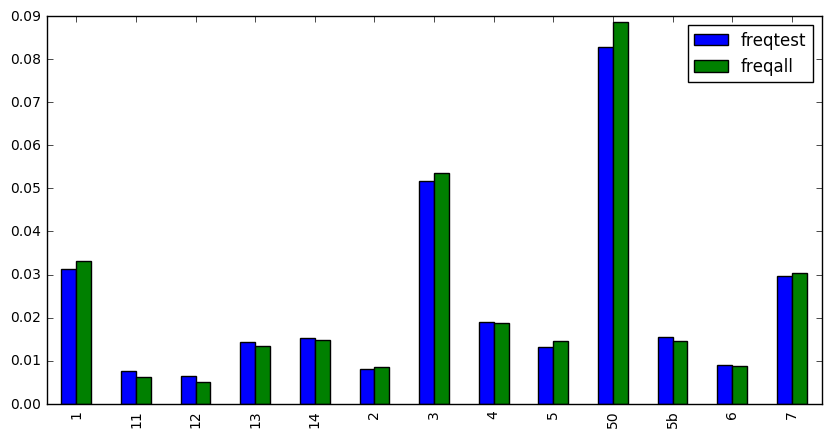

In [247]:
df2 = pd.DataFrame(df[["freqtest","freqall"]])
df2.set_index(df["codes"].values, inplace=True)
df2.plot.bar(figsize=(10,5))

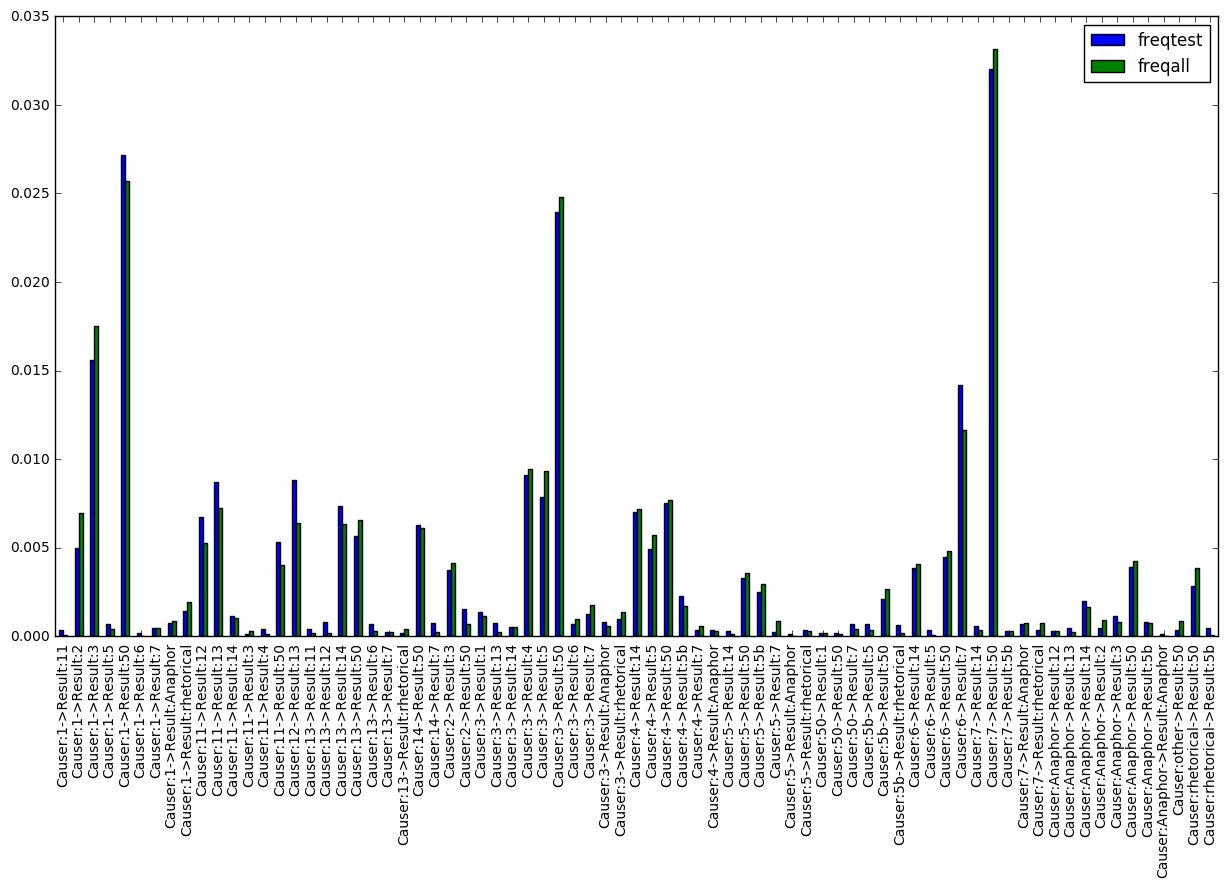

In [252]:
df3 = compare_wd_tag_dist(test, causal_codes)
df2 = pd.DataFrame(df3[["freqtest","freqall"]])
df2.set_index(df3["codes"].values, inplace=True)
df2.plot.bar(figsize=(15,8))

In [254]:
max_value = 10.0
def kl2(a,b):
    join = zip(a,b)
    kl_val_a = 0.0
    kl_val_b = 0.0
    for pa, pb in join:
        if pa == 0.0:
            #both 0.0, shouldn't happen
            if pb == 0.0:
                continue
            kl_val_b += max_value
        else: #pa > 0.0
            if pb == 0.0:
                kl_val_a += max_value
            else:
                kl_val_a += pa*np.log(pa/pb)
                kl_val_b += pb*np.log(pb/pa)                
    return kl_val_a, kl_val_b

In [255]:
%%time
kl_vals = {}
for i in range(10000):
    tr, tst = random_splt(essays, n_test)
    test_wd_freq, test_sent_freq = compute_tag_distributions(tst, causal_codes)
    vals = kl2(wd_tag_freq_causal.values(), test_wd_freq.values())
    # map to abs values
    vals = list(map(abs, vals))
    max_val = max(vals)
    kl_vals[max_val] = (tr,tst)

# Get best
best_kl_causal2, best_split_causl2 = min(kl_vals.items(), key=lambda (k,v): k)
best_kl_causal2

CPU times: user 2min 28s, sys: 462 ms, total: 2min 28s
Wall time: 2min 29s


In [257]:
best_kl_causal2

0.49708483344214649

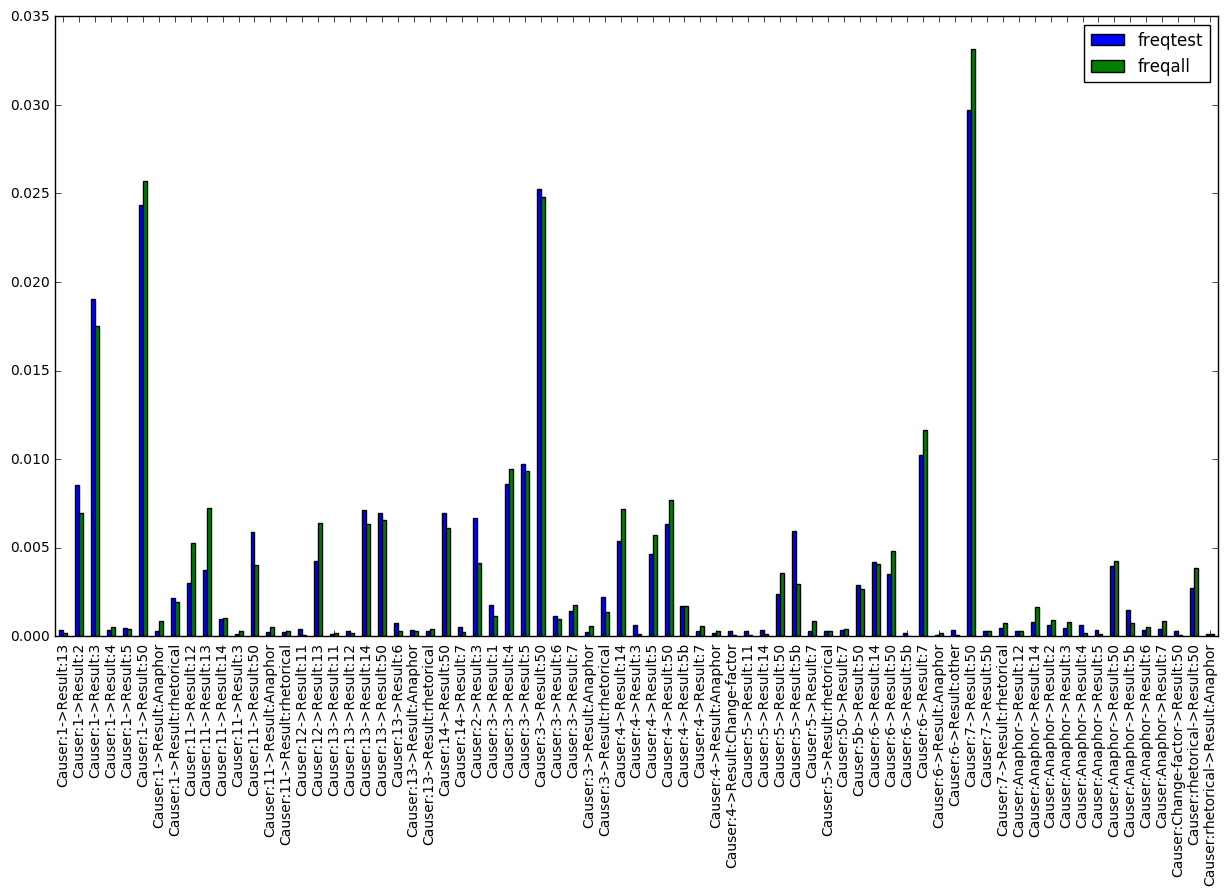

In [261]:
train, test = best_split_causl2
df3 = compare_wd_tag_dist(test, causal_codes)
df2 = pd.DataFrame(df3[["freqtest","freqall"]])
df2.set_index(df3["codes"].values, inplace=True)
df2.plot.bar(figsize=(15,8))